In [14]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

from cycler import cycler
import matplotlib.cm as cm

# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)

%matplotlib widget

/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_52860/1886163394.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [ ]:
Bi_ion_25bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_merged.h5", "MC/E")
Bi_ion_15bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_15bar_merged.h5", "MC/E")
Bi_ion_10bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_10bar_merged.h5", "MC/E")
Bi_ion_5bar  = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_5bar_merged.h5", "MC/E")
Bi_ion_1bar  = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_1bar_merged.h5", "MC/E")
display(Bi_ion_15bar)
display(Bi_ion_25bar)

Bi_ion_25bar_events = len(Bi_ion_25bar.event_id.unique())
Bi_ion_15bar_events = len(Bi_ion_15bar.event_id.unique())
Bi_ion_10bar_events = len(Bi_ion_10bar.event_id.unique())
Bi_ion_5bar_events  = len(Bi_ion_5bar.event_id.unique())
Bi_ion_1bar_events  = len(Bi_ion_1bar.event_id.unique())

print(len(Bi_ion_25bar.event_id.unique()), len(Bi_ion_15bar.event_id.unique()), len(Bi_ion_10bar.event_id.unique()), len(Bi_ion_5bar.event_id.unique()), len(Bi_ion_1bar.event_id.unique()))


Tl_ion_25bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_25bar_merged.h5", "MC/E")
Tl_ion_15bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_15bar_merged.h5", "MC/E")
Tl_ion_10bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_10bar_merged.h5", "MC/E")
Tl_ion_5bar  = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_5bar_merged.h5", "MC/E")
Tl_ion_1bar  = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_1bar_merged.h5", "MC/E")

Tl_ion_25bar_events = len(Tl_ion_25bar.event_id.unique())
Tl_ion_15bar_events = len(Tl_ion_15bar.event_id.unique())
Tl_ion_10bar_events = len(Tl_ion_10bar.event_id.unique())
Tl_ion_5bar_events  = len(Tl_ion_5bar.event_id.unique())
Tl_ion_1bar_events  = len(Tl_ion_1bar.event_id.unique())

In [ ]:
# These scale factors  correct for reconstruction efficiency, divide by total generated and multiply by mass of copper

MCu = [65384.54852258, 22563.22807345, 14302.84599257, 10957.27914774, 7837.01088115]

sf_Bi_25bar = (0.37 * 1.28e-6 * 3.15e7 * MCu[4] * 567325)/(Bi_ion_25bar_events * 1051920000)
sf_Bi_15bar = (0.37 * 1.28e-6 * 3.15e7 * MCu[3] * 346255)/(Bi_ion_15bar_events * 1160960000)
sf_Bi_10bar = (0.37 * 1.28e-6 * 3.15e7 * MCu[2] * 561505)/(Bi_ion_10bar_events * 3000000000)
sf_Bi_5bar  = (0.37 * 1.28e-6 * 3.15e7 * MCu[1] * 539209)/(Bi_ion_5bar_events  * 6297900000)
sf_Bi_1bar  = (0.37 * 1.28e-6 * 3.15e7 * MCu[0] * 582493)/(Bi_ion_1bar_events  * 29970000000)

print(sf_Bi_25bar, sf_Bi_15bar, sf_Bi_10bar, sf_Bi_5bar, sf_Bi_1bar)

sf_Tl_25bar = ( 0.37 * 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[4] * 1510776)/(Tl_ion_25bar_events * 150000000)
sf_Tl_15bar = ( 0.37 * 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[3] * 1597985)/(Tl_ion_15bar_events * 210000000)
sf_Tl_10bar = ( 0.37 * 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[2] * 1529381)/(Tl_ion_10bar_events * 259998000)
sf_Tl_5bar  = ( 0.37 * 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[1] * 1814424)/(Tl_ion_5bar_events  * 510000000)
sf_Tl_1bar  = ( 0.37 * 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[0] * 1726116)/(Tl_ion_1bar_events  * 2067930000)

print(sf_Tl_25bar, sf_Tl_15bar, sf_Tl_10bar, sf_Tl_5bar, sf_Tl_1bar)

0.00030523578067408516 0.0003805449759137927 0.0001922302501401408 0.000144452810606949 8.796479801235987e-05
0.0007216184822775764 0.0007206624410026894 0.0007598028396953467 0.0006110538918385262 0.0004362653172932506


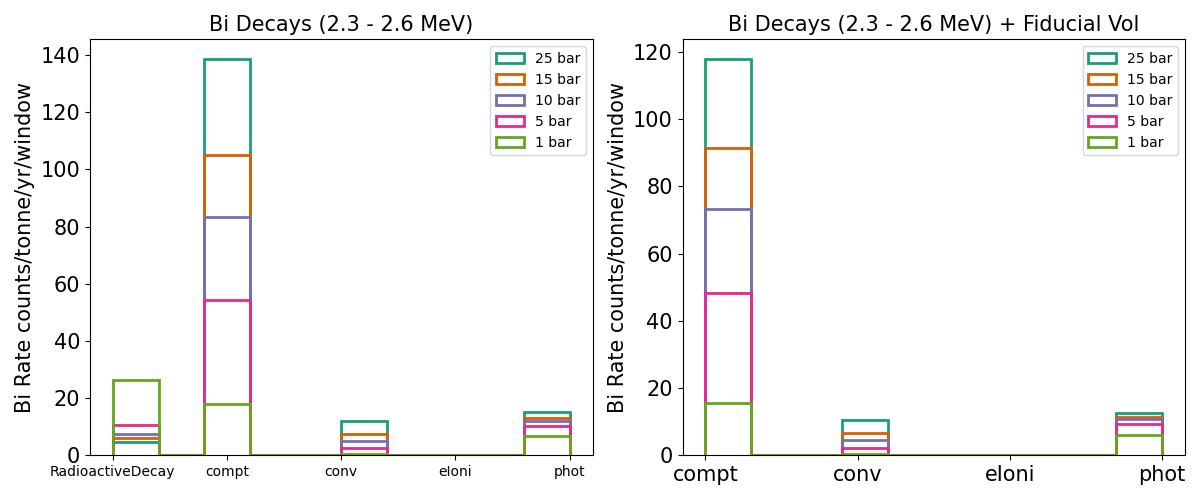

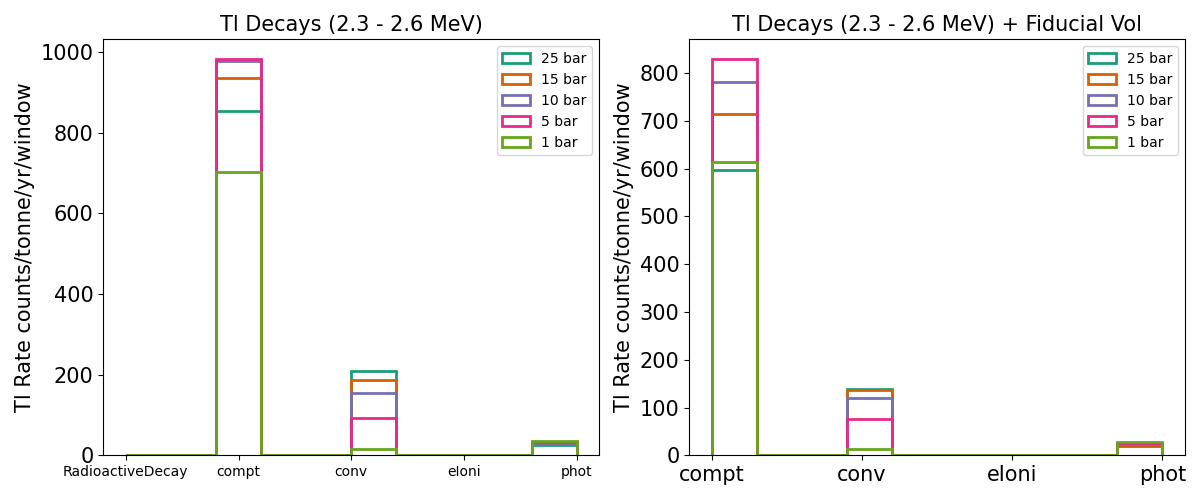

In [ ]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)  # row, col,index
plt.hist(sorted(Bi_ion_25bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_25bar.CreatorProc) * sf_Bi_25bar, label = "25 bar");
plt.hist(sorted(Bi_ion_15bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_15bar.CreatorProc) * sf_Bi_15bar, label = "15 bar");
plt.hist(sorted(Bi_ion_10bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_10bar.CreatorProc) * sf_Bi_10bar, label = "10 bar");
plt.hist(sorted(Bi_ion_5bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_5bar.CreatorProc)  * sf_Bi_5bar , label = "5 bar");
plt.hist(sorted(Bi_ion_1bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_1bar.CreatorProc)  * sf_Bi_1bar , label = "1 bar");

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.legend()
plt.tick_params(axis='y', which='both', labelsize=15)
plt.tight_layout()

plt.subplot(1, 2, 2)  # row, col,index
plt.hist(sorted(Bi_ion_25bar[Bi_ion_25bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_25bar[Bi_ion_25bar.contained == True].CreatorProc) * sf_Bi_25bar, label = "25 bar");
plt.hist(sorted(Bi_ion_15bar[Bi_ion_15bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_15bar[Bi_ion_15bar.contained == True].CreatorProc) * sf_Bi_15bar, label = "15 bar");
plt.hist(sorted(Bi_ion_10bar[Bi_ion_10bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_10bar[Bi_ion_10bar.contained == True].CreatorProc) * sf_Bi_10bar, label = "10 bar");
plt.hist(sorted(Bi_ion_5bar[Bi_ion_5bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_5bar[Bi_ion_5bar.contained == True].CreatorProc)  * sf_Bi_5bar,  label = "5 bar");
plt.hist(sorted(Bi_ion_1bar[Bi_ion_1bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_1bar[Bi_ion_1bar.contained == True].CreatorProc)  * sf_Bi_1bar,  label = "1 bar");

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV) + Fiducial Vol", fontsize=15)
plt.legend()
plt.tick_params(axis='both', which='both', labelsize=15)
plt.tight_layout()

plt.savefig(f"plots/Technote/ParentProcessBi.pdf")


plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)  # row, col,index
plt.hist(sorted(Tl_ion_25bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_25bar.CreatorProc) * sf_Tl_25bar, label = "25 bar");
plt.hist(sorted(Tl_ion_15bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_15bar.CreatorProc) * sf_Tl_15bar, label = "15 bar");
plt.hist(sorted(Tl_ion_10bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_10bar.CreatorProc) * sf_Tl_10bar, label = "10 bar");
plt.hist(sorted(Tl_ion_5bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_5bar.CreatorProc)  * sf_Tl_5bar, label = "5 bar");
plt.hist(sorted(Tl_ion_1bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_1bar.CreatorProc)  * sf_Tl_1bar, label = "1 bar");

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.legend()
plt.tick_params(axis='y', which='both', labelsize=15)
plt.tight_layout()

plt.subplot(1, 2, 2)  # row, col,index
plt.hist(sorted(Tl_ion_25bar[Tl_ion_25bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_25bar[Tl_ion_25bar.contained == True].CreatorProc) * sf_Tl_25bar, label = "25 bar");
plt.hist(sorted(Tl_ion_15bar[Tl_ion_15bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_15bar[Tl_ion_15bar.contained == True].CreatorProc) * sf_Tl_15bar, label = "15 bar");
plt.hist(sorted(Tl_ion_10bar[Tl_ion_10bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_10bar[Tl_ion_10bar.contained == True].CreatorProc) * sf_Tl_10bar, label = "10 bar");
plt.hist(sorted(Tl_ion_5bar[Tl_ion_5bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_5bar[Tl_ion_5bar.contained == True].CreatorProc)  * sf_Tl_5bar, label = "5 bar");
plt.hist(sorted(Tl_ion_1bar[Tl_ion_1bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_1bar[Tl_ion_1bar.contained == True].CreatorProc)  * sf_Tl_1bar, label = "1 bar");

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV) + Fiducial Vol", fontsize=15)
plt.legend()
plt.tick_params(axis='both', which='both', labelsize=15)
plt.tight_layout()

plt.savefig(f"plots/Technote/ParentProcessTl.pdf")

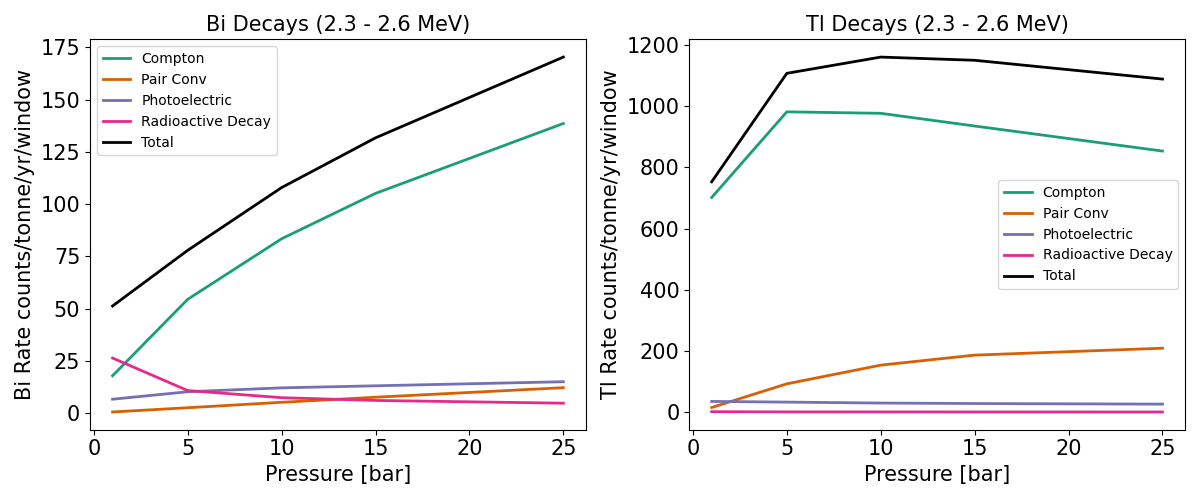

In [ ]:
plt.figure(figsize=(12,5))

def GetRProc(df, proc, sf):

    # return len(df[ (df.contained == True) & (df.CreatorProc == proc)]) * sf
    return len(df[ (df.CreatorProc == proc)]) * sf

pressures = [1, 5, 10, 15, 25]
rate_Bi_Comp = np.array([ GetRProc(Bi_ion_1bar, "compt", sf_Bi_1bar), GetRProc(Bi_ion_5bar, "compt", sf_Bi_5bar), GetRProc(Bi_ion_10bar, "compt", sf_Bi_10bar), GetRProc(Bi_ion_15bar, "compt", sf_Bi_15bar), GetRProc(Bi_ion_25bar, "compt", sf_Bi_25bar) ])
rate_Tl_Comp = np.array([ GetRProc(Tl_ion_1bar, "compt", sf_Tl_1bar), GetRProc(Tl_ion_5bar, "compt", sf_Tl_5bar), GetRProc(Tl_ion_10bar, "compt", sf_Tl_10bar), GetRProc(Tl_ion_15bar, "compt", sf_Tl_15bar), GetRProc(Tl_ion_25bar, "compt", sf_Tl_25bar) ])

rate_Bi_Conv = np.array([ GetRProc(Bi_ion_1bar, "conv", sf_Bi_1bar),  GetRProc(Bi_ion_5bar, "conv", sf_Bi_5bar),  GetRProc(Bi_ion_10bar, "conv", sf_Bi_10bar),  GetRProc(Bi_ion_15bar, "conv", sf_Bi_15bar),  GetRProc(Bi_ion_25bar, "conv", sf_Bi_25bar) ])
rate_Tl_Conv = np.array([ GetRProc(Tl_ion_1bar, "conv", sf_Tl_1bar),  GetRProc(Tl_ion_5bar, "conv", sf_Tl_5bar),  GetRProc(Tl_ion_10bar, "conv", sf_Tl_10bar),  GetRProc(Tl_ion_15bar, "conv", sf_Tl_15bar),  GetRProc(Tl_ion_25bar, "conv", sf_Tl_25bar) ])

rate_Bi_Phot = np.array([ GetRProc(Bi_ion_1bar, "phot", sf_Bi_1bar),  GetRProc(Bi_ion_5bar, "phot", sf_Bi_5bar),  GetRProc(Bi_ion_10bar, "phot", sf_Bi_10bar),  GetRProc(Bi_ion_15bar, "phot", sf_Bi_15bar),  GetRProc(Bi_ion_25bar, "phot", sf_Bi_25bar) ])
rate_Tl_Phot = np.array([ GetRProc(Tl_ion_1bar, "phot", sf_Tl_1bar),  GetRProc(Tl_ion_5bar, "phot", sf_Tl_5bar),  GetRProc(Tl_ion_10bar, "phot", sf_Tl_10bar),  GetRProc(Tl_ion_15bar, "phot", sf_Tl_15bar),  GetRProc(Tl_ion_25bar, "phot", sf_Tl_25bar) ])

rate_Bi_Decay = np.array([ GetRProc(Bi_ion_1bar, "RadioactiveDecay", sf_Bi_1bar),  GetRProc(Bi_ion_5bar, "RadioactiveDecay", sf_Bi_5bar),  GetRProc(Bi_ion_10bar, "RadioactiveDecay", sf_Bi_10bar),  GetRProc(Bi_ion_15bar, "RadioactiveDecay", sf_Bi_15bar),  GetRProc(Bi_ion_25bar, "RadioactiveDecay", sf_Bi_25bar) ])
rate_Tl_Decay = np.array([ GetRProc(Tl_ion_1bar, "RadioactiveDecay", sf_Tl_1bar),  GetRProc(Tl_ion_5bar, "RadioactiveDecay", sf_Tl_5bar),  GetRProc(Tl_ion_10bar, "RadioactiveDecay", sf_Tl_10bar),  GetRProc(Tl_ion_15bar, "RadioactiveDecay", sf_Tl_15bar),  GetRProc(Tl_ion_25bar, "RadioactiveDecay", sf_Tl_25bar) ])

plt.subplot(1, 2, 1)  # row, col,index
plt.plot(pressures, rate_Bi_Comp, linewidth=2,  label = "Compton")
plt.plot(pressures, rate_Bi_Conv, linewidth=2,  label = "Pair Conv")
plt.plot(pressures, rate_Bi_Phot, linewidth=2,  label = "Photoelectric")
plt.plot(pressures, rate_Bi_Decay, linewidth=2,  label = "Radioactive Decay")
plt.plot(pressures, rate_Bi_Comp + rate_Bi_Conv + rate_Bi_Phot + rate_Bi_Decay, linewidth=2,  label = "Total", color = "k")

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)  # row, col,index
plt.plot(pressures, rate_Tl_Comp, linewidth = 2, label = "Compton")
plt.plot(pressures, rate_Tl_Conv, linewidth = 2, label = "Pair Conv")
plt.plot(pressures, rate_Tl_Phot, linewidth = 2, label = "Photoelectric")
plt.plot(pressures, rate_Tl_Decay, linewidth=2,  label = "Radioactive Decay")
plt.plot(pressures, rate_Tl_Comp + rate_Tl_Conv + rate_Tl_Phot + rate_Tl_Decay, linewidth=2,  label = "Total", color = "k")

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()


plt.savefig(f"plots/Technote/ParentProcessPressure.pdf")

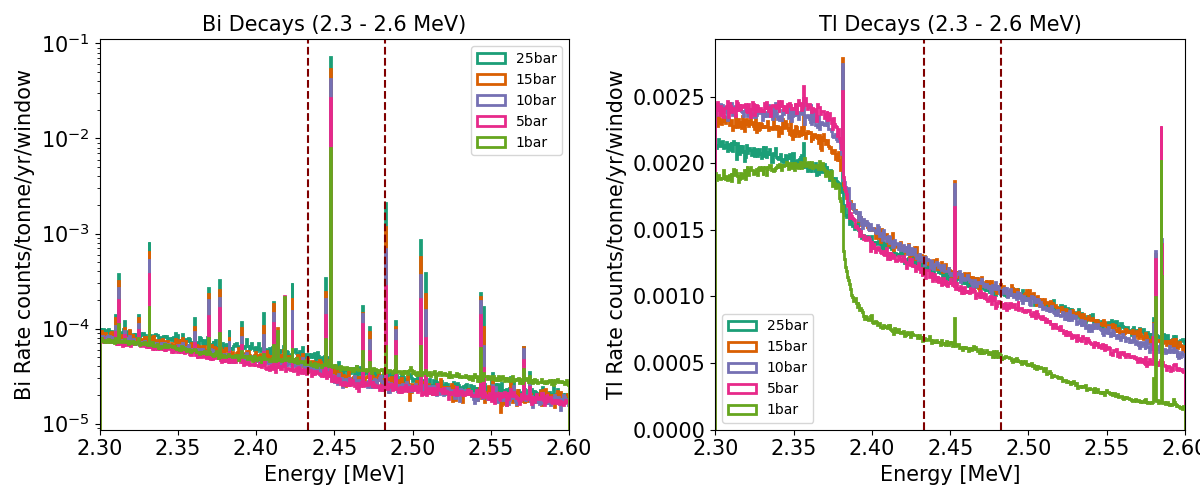

In [ ]:
plt.figure(figsize=(12,5))

# 6.012e-4 is the bin width in MeV

plt.subplot(1, 2, 1)  # row, col,index 
plt.hist(Bi_ion_25bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_25bar.energy) * sf_Bi_25bar*6.012e-4, label = "25bar");
plt.hist(Bi_ion_15bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_15bar.energy) * sf_Bi_15bar*6.012e-4, label = "15bar");
plt.hist(Bi_ion_10bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_10bar.energy) * sf_Bi_10bar*6.012e-4, label = "10bar");
plt.hist(Bi_ion_5bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_5bar.energy) * sf_Bi_5bar*6.012e-4, label = "5bar");
plt.hist(Bi_ion_1bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_1bar.energy) * sf_Bi_1bar*6.012e-4, label = "1bar");

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Energy [MeV]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.tight_layout()

plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")
plt.xlim(2.3,2.6)


plt.subplot(1, 2, 2)  # row, col,index
plt.hist(Tl_ion_25bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_25bar.energy) * sf_Tl_25bar*6.012e-4, label = "25bar");
plt.hist(Tl_ion_15bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_15bar.energy) * sf_Tl_15bar*6.012e-4, label = "15bar");
plt.hist(Tl_ion_10bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_10bar.energy) * sf_Tl_10bar*6.012e-4, label = "10bar");
plt.hist(Tl_ion_5bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_5bar.energy) * sf_Tl_5bar*6.012e-4, label = "5bar");
plt.hist(Tl_ion_1bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_1bar.energy) * sf_Tl_1bar*6.012e-4, label = "1bar");

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Energy [MeV]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
# plt.semilogy()
plt.tight_layout()
plt.xlim(2.3,2.6)

plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")

plt.savefig(f"plots/Technote/BiTlEnergySpectrum.pdf")

In [ ]:
print("Fraction Uncontained Bi 25 bar:", 100*len(Bi_ion_25bar[Bi_ion_25bar.contained == False])/len(Bi_ion_25bar[Bi_ion_25bar.contained == True]))
print("Fraction Uncontained Bi 15 bar:", 100*len(Bi_ion_15bar[Bi_ion_15bar.contained == False])/len(Bi_ion_15bar[Bi_ion_15bar.contained == True]))
print("Fraction Uncontained Bi 10 bar:", 100*len(Bi_ion_10bar[Bi_ion_10bar.contained == False])/len(Bi_ion_10bar[Bi_ion_10bar.contained == True]))

Fraction Uncontained Bi 25 bar: 20.928489742168008
Fraction Uncontained Bi 15 bar: 20.540081391665186
Fraction Uncontained Bi 10 bar: 21.869723185644027


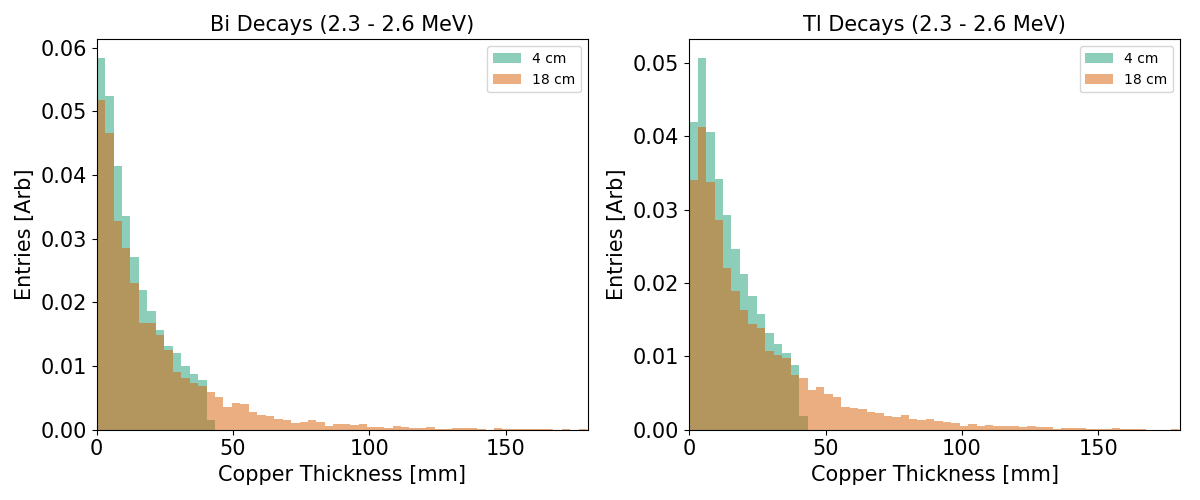

In [ ]:
Bi_ion_25bar_4cm = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_4cm_merged.h5", "MC/E")
Bi_ion_25bar_18cm = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_18cm_merged.h5", "MC/E")
Tl_ion_25bar_4cm = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_25bar_4cm_merged.h5", "MC/E")
Tl_ion_25bar_18cm = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_25bar_18cm_merged.h5", "MC/E")


Bi_ion_25bar_4cm = Bi_ion_25bar_4cm[ (Bi_ion_25bar_4cm.initial_z >-800)  & (Bi_ion_25bar_4cm.initial_z < 800)]
Bi_ion_25bar_18cm = Bi_ion_25bar_18cm[ (Bi_ion_25bar_18cm.initial_z >-800)  & (Bi_ion_25bar_18cm.initial_z < 800)]
Bi_ion_25bar_4cm["R"] = np.sqrt(Bi_ion_25bar_4cm.initial_x**2 + Bi_ion_25bar_4cm.initial_y**2)
Bi_ion_25bar_18cm["R"] = np.sqrt(Bi_ion_25bar_18cm.initial_x**2 + Bi_ion_25bar_18cm.initial_y**2)

Tl_ion_25bar_4cm       = Tl_ion_25bar_4cm[ (Tl_ion_25bar_4cm.initial_z >-800)  & (Tl_ion_25bar_4cm.initial_z < 800)]
Tl_ion_25bar_18cm      = Tl_ion_25bar_18cm[ (Tl_ion_25bar_18cm.initial_z >-800)  & (Tl_ion_25bar_18cm.initial_z < 800)]
Tl_ion_25bar_4cm["R"]  = np.sqrt(Tl_ion_25bar_4cm.initial_x**2 + Tl_ion_25bar_4cm.initial_y**2)
Tl_ion_25bar_18cm["R"] = np.sqrt(Tl_ion_25bar_18cm.initial_x**2 + Tl_ion_25bar_18cm.initial_y**2)



plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)  # row, col,index
plt.hist(Bi_ion_25bar_4cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "4 cm", linewidth=2);
plt.hist(Bi_ion_25bar_18cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "18 cm", linewidth=2);
plt.xlim(0,180)
plt.xlabel("Copper Thickness [mm]", fontsize=15)
plt.ylabel("Entries [Arb]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.tight_layout()


plt.subplot(1, 2, 2)  # row, col,index
plt.hist(Tl_ion_25bar_4cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "4 cm", linewidth=2);
plt.hist(Tl_ion_25bar_18cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "18 cm", linewidth=2);
plt.xlim(0,180)
plt.xlabel("Copper Thickness [mm]", fontsize=15)
plt.ylabel("Entries [Arb]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.tight_layout()

plt.savefig(f"plots/Technote/CuDepth.pdf")

### Here we look at the NEXT1t geometry and also compare to the ATPC geometry with PTFE added

In [ ]:
Bi_ion_Next1t_Cu   = pd.read_hdf("../data/GammaTables/NextTonne/GammaTable_Bi_ion_INNER_SHIELDING_merged.h5", "MC/E")
Bi_ion_Next1t_PTFE = pd.read_hdf("../data/GammaTables/NextTonne/GammaTable_Bi_ion_FIELD_CAGE_merged.h5", "MC/E")
Bi_ion_ATPC_PTFE   = pd.read_hdf("../data/GammaTables/NextTonne/GammaTable_ATPC_PTFE_Bi_ion_merged.h5", "MC/E")

Tl_ion_Next1t_Cu   = pd.read_hdf("../data/GammaTables/NextTonne/GammaTable_Tl_ion_INNER_SHIELDING_merged.h5", "MC/E")
Tl_ion_Next1t_PTFE = pd.read_hdf("../data/GammaTables/NextTonne/GammaTable_Tl_ion_FIELD_CAGE_merged.h5", "MC/E")
Tl_ion_ATPC_PTFE   = pd.read_hdf("../data/GammaTables/NextTonne/GammaTable_ATPC_PTFE_Tl_ion_merged.h5", "MC/E")

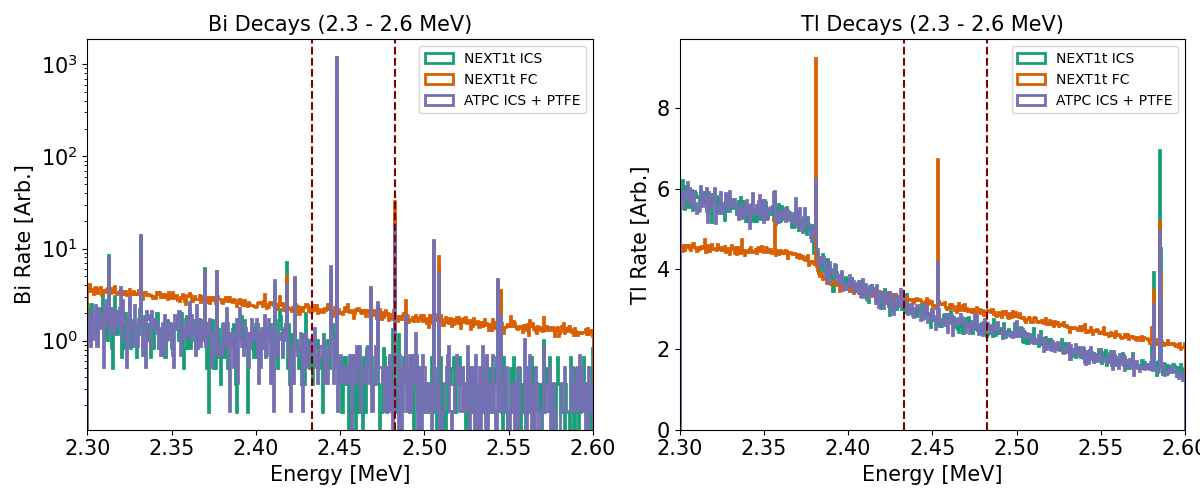

In [ ]:
plt.figure(figsize=(12,5))

# 6.012e-4 is the bin width in MeV

plt.subplot(1, 2, 1)  # row, col,index 
plt.hist(Bi_ion_Next1t_Cu.energy,   bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, density = True, label = "NEXT1t ICS");
plt.hist(Bi_ion_Next1t_PTFE.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, density = True, label = "NEXT1t FC");
plt.hist(Bi_ion_ATPC_PTFE.energy,   bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, density = True, label = "ATPC ICS + PTFE");

plt.ylabel("Bi Rate [Arb.]", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Energy [MeV]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.tight_layout()

plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")
plt.xlim(2.3,2.6)


plt.subplot(1, 2, 2)  # row, col,index
plt.hist(Tl_ion_Next1t_Cu.energy,   bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2,density = True, label = "NEXT1t ICS");
plt.hist(Tl_ion_Next1t_PTFE.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2,density = True, label = "NEXT1t FC");
plt.hist(Tl_ion_ATPC_PTFE.energy,   bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2,density = True, label = "ATPC ICS + PTFE");

plt.ylabel("Tl Rate [Arb.]", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Energy [MeV]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
# plt.semilogy()
plt.tight_layout()
plt.xlim(2.3,2.6)

plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")
plt.show()

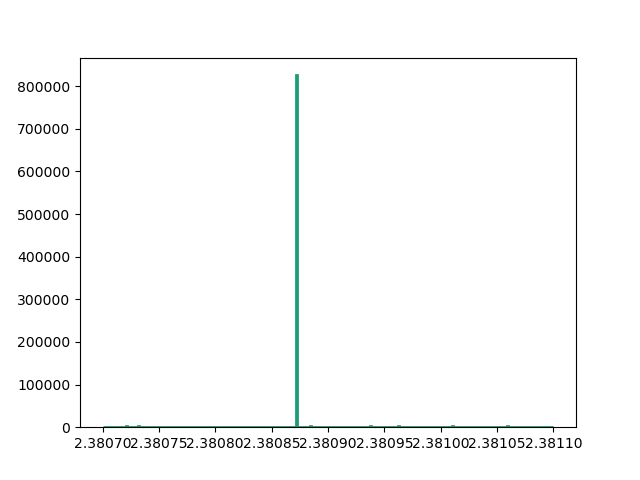

In [ ]:
plt.figure()

# plt.hist(Tl_ion_Next1t_PTFE.energy, bins = np.linspace(2.4528,2.4532,500), histtype="step", linewidth=2,density = True, label = "NEXT1t FC");
plt.hist(Tl_ion_Next1t_PTFE.energy, bins = np.linspace(2.3807,2.3811,500), histtype="step", linewidth=2,density = True, label = "NEXT1t FC");

In [ ]:
# Lets try to figure out what the events are with the peak in the signal region for Tl

parts = pd.read_hdf(f"../data/GammaTables/NextTonne/NEXT1t_Tl_ion_FIELD_CAGE.h5", "MC/particles")
hits = pd.read_hdf(f"../data/GammaTables/NextTonne/NEXT1t_Tl_ion_FIELD_CAGE.h5", "MC/hits")

# display(parts)
# display(hits)

hit_tot_energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

Filtered_hits = hit_tot_energy[(hit_tot_energy.hit_tot_energy > 2.38086) & (hit_tot_energy.hit_tot_energy < 2.38089)  ] # Edge peak
# Filtered_hits = hit_tot_energy[(hit_tot_energy.hit_tot_energy > 2.45305) & (hit_tot_energy.hit_tot_energy < 2.45307)  ] # ROI peak
# display(Filtered_hits)
parts = parts[parts.event_id.isin(Filtered_hits.event_id.unique())]
event_ids = parts.event_id.unique()

In [ ]:
part = parts[parts.event_id == event_ids[3]]
part["kin_energy"] = part["kin_energy"]*1e3
pd.set_option('display.max_rows', None)
display(part[part.particle_name == "gamma"][["event_id", "particle_id", "mother_id", "particle_name", "kin_energy", "creator_proc", "initial_volume", "final_volume", "final_proc", "initial_x", "initial_y", "initial_z", "final_x", "final_y", "final_z"]])

/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_52860/3762088919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part["kin_energy"] = part["kin_energy"]*1e3


,event_id,particle_id,mother_id,particle_name,kin_energy,creator_proc,initial_volume,final_volume,final_proc,initial_x,initial_y,initial_z,final_x,final_y,final_z
102692,10792,6,2,gamma,277.366791,RadioactiveDecay,FIELD_CAGE,ACTIVE,phot,-911.243042,931.428406,111.706879,-635.888977,265.427460,465.234009
102702,10792,12,6,gamma,29.781301,phot,ACTIVE,ACTIVE,phot,-635.888977,265.427460,465.234009,-624.071289,249.822449,485.003174
102721,10792,35,5,gamma,583.188110,RadioactiveDecay,FIELD_CAGE,ICS,phot,-911.243042,931.428406,111.706879,-949.522034,919.675110,110.468346
102723,10792,48,35,gamma,8.005711,phot,ICS,ICS,phot,-949.522034,919.675110,110.468346,-949.530823,919.681030,110.464279
102741,10792,55,34,gamma,2614.504395,RadioactiveDecay,FIELD_CAGE,ACTIVE,conv,-911.243042,931.428406,111.706879,293.084045,-238.787613,522.163940
102744,10792,65,57,gamma,510.998901,annihil,ACTIVE,ICS,phot,276.682068,-235.017151,486.543457,-350.912811,1264.811279,849.464600
102753,10792,74,66,gamma,133.412979,eBrem,ICS,ICS,phot,-350.959442,1264.859619,849.484924,-353.392426,1272.462524,850.256897
102756,10792,81,74,gamma,8.005711,phot,ICS,ICS,phot,-353.392426,1272.462524,850.256897,-353.384155,1272.461060,850.257080
102767,10792,64,57,gamma,510.998901,annihil,ACTIVE,ACTIVE,phot,276.682068,-235.017151,486.543457,583.132141,-391.807343,443.699097
102773,10792,111,64,gamma,4.412990,phot,ACTIVE,ACTIVE,phot,583.132141,-391.807343,443.699097,582.983521,-391.742035,443.754364
